# Regression of Auckland House Prices

In [11]:
import json
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

data = pd.read_csv("dataset.csv")
df = pd.DataFrame(data)

In [12]:
def get_pop(lat, lon):
    url = 'https://koordinates.com/services/query/v1/vector.json'

    params = { 
        'key' : 'd8065104665b4cf8b2ea62389e47950e',
        'layer' : '104612',
        'x' : lon,
        'y' : lat,
    }

    response = requests.get(url, params=params)
    
    if response.status_code != 200:
        return pd.Series({'C18_CURPop' : response.status_code})

    pop = response.json()['vectorQuery']['layers']['104612']['features'][0]['properties']['C18_CNPop']
    return pd.Series({'C18_CURPop' : pop})

In [13]:
df['C18_CURPop'] = df.apply(lambda x: get_pop(x['Latitude'], x['Longitude']), axis=1)
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,177
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,123
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,123
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,228


In [14]:
dep = pd.read_excel('otago730395.xlsx')
dep.head()

,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,7000000,10.0,1245.0,141,100100,North Cape
1,7000001,10.0,1245.0,114,100100,North Cape
2,7000002,NaN,NaN,0,100300,Inlets Far North District
3,7000003,10.0,1207.0,225,100100,North Cape
4,7000004,9.0,1093.0,138,100100,North Cape


In [15]:
df = df.merge(dep, left_on='SA1', right_on='SA12018_code')
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,...,50-59 years,60+ years,Suburbs,C18_CURPop,SA12018_code,NZDep2018,NZDep2018_Score,URPopnSA1_2018,SA22018_code,SA22018_name
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,...,24,21,Manurewa,177,7009770,6.0,997.0,174,159600,Hillpark North
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,...,15,30,Karaka,123,7009991,1.0,881.0,129,162500,Hingaia
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,...,15,30,Karaka,123,7009991,1.0,881.0,129,162500,Hingaia
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,...,12,15,Onehunga,120,7007871,2.0,908.0,120,144300,Onehunga North
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,...,21,33,Clover Park,228,7008902,9.0,1091.0,231,157700,Clover Park North


In [16]:
df = df.drop(columns=['SA12018_code', 'NZDep2018_Score', 'URPopnSA1_2018', 'SA22018_code', 'SA22018_name'])
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,960000,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,177,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,1250000,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,123,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,1250000,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,123,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,740000,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,630000,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,228,9.0


In [17]:
df.describe()

,Bedrooms,Bathrooms,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,C18_CURPop,NZDep2018
count,1051.000000,1049.000000,1.051000e+03,1051.000000,1051.000000,1.051000e+03,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000,1051.000000
mean,3.777355,2.073403,1.387521e+06,-36.893715,174.799325,7.006319e+06,47.549001,28.963844,27.042816,24.125595,22.615604,29.360609,181.230257,5.063749
std,1.169412,0.992985,1.182939e+06,0.130100,0.119538,2.591262e+03,24.692205,21.037441,17.975408,10.942770,10.210578,21.805031,72.087700,2.913471
min,1.000000,1.000000,2.700000e+05,-37.265021,174.317078,7.001130e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3.000000,1.000000,7.800000e+05,-36.950565,174.720779,7.004416e+06,33.000000,15.000000,15.000000,18.000000,15.000000,18.000000,138.000000,2.000000
50%,4.000000,2.000000,1.080000e+06,-36.893132,174.798575,7.006325e+06,45.000000,24.000000,24.000000,24.000000,21.000000,27.000000,171.000000,5.000000
75%,4.000000,3.000000,1.600000e+06,-36.855789,174.880944,7.008384e+06,57.000000,36.000000,33.000000,30.000000,27.000000,36.000000,210.000000,8.000000
max,17.000000,8.000000,1.800000e+07,-36.177655,175.492424,7.011028e+06,201.000000,270.000000,177.000000,114.000000,90.000000,483.000000,792.000000,10.000000


In [18]:
df.isnull().values.any()

True

In [19]:
df1 = df[df.isna().any(axis=1)]
df1

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214,1250000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,246,2.0
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245,1100000,-36.798371,174.647430,7002267,60,66,60,24,24,18,Hobsonville,246,2.0
568,1,1.0,"14 Te Rangitawhiri Road Great Barrier Island, ...",2141,740000,-36.197282,175.416921,7001131,27,6,6,18,39,60,NaN,156,9.0


In [20]:
df = df.drop([568], axis = 0)

In [21]:
df1 = df[df.isna().any(axis=1)]
df1

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018
309,4,NaN,"14 Hea Road Hobsonville, Auckland",214,1250000,-36.798371,174.64743,7002267,60,66,60,24,24,18,Hobsonville,246,2.0
311,4,NaN,"16 Hea Road Hobsonville, Auckland",245,1100000,-36.798371,174.64743,7002267,60,66,60,24,24,18,Hobsonville,246,2.0


In [22]:
df['CV'] = np.log(df['CV'])
df.head()

,Bedrooms,Bathrooms,Address,Land area,CV,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,Suburbs,C18_CURPop,NZDep2018
0,5,3.0,"106 Lawrence Crescent Hill Park, Auckland",714,13.774689,-37.012920,174.904069,7009770,48,27,24,21,24,21,Manurewa,177,6.0
1,5,3.0,"8 Corsica Way Karaka, Auckland",564,14.038654,-37.063672,174.922912,7009991,42,18,12,21,15,30,Karaka,123,1.0
2,6,4.0,"243 Harbourside Drive Karaka, Auckland",626,14.038654,-37.063580,174.924044,7009991,42,18,12,21,15,30,Karaka,123,1.0
3,2,1.0,"2/30 Hardington Street Onehunga, Auckland",65,13.514405,-36.912996,174.787425,7007871,42,6,21,21,12,15,Onehunga,120,2.0
4,3,1.0,"59 Israel Avenue Clover Park, Auckland",601,13.353475,-36.979037,174.892612,7008902,93,27,33,30,21,33,Clover Park,228,9.0


In [23]:
df.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area       object
CV             float64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
C18_CURPop       int64
NZDep2018      float64
dtype: object

In [24]:
df['Land area'] = df['Land area'].str.extract('(\d+)').astype(int)

In [25]:
df.dtypes

Bedrooms         int64
Bathrooms      float64
Address         object
Land area        int64
CV             float64
Latitude       float64
Longitude      float64
SA1              int64
0-19 years       int64
20-29 years      int64
30-39 years      int64
40-49 years      int64
50-59 years      int64
60+ years        int64
Suburbs         object
C18_CURPop       int64
NZDep2018      float64
dtype: object

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


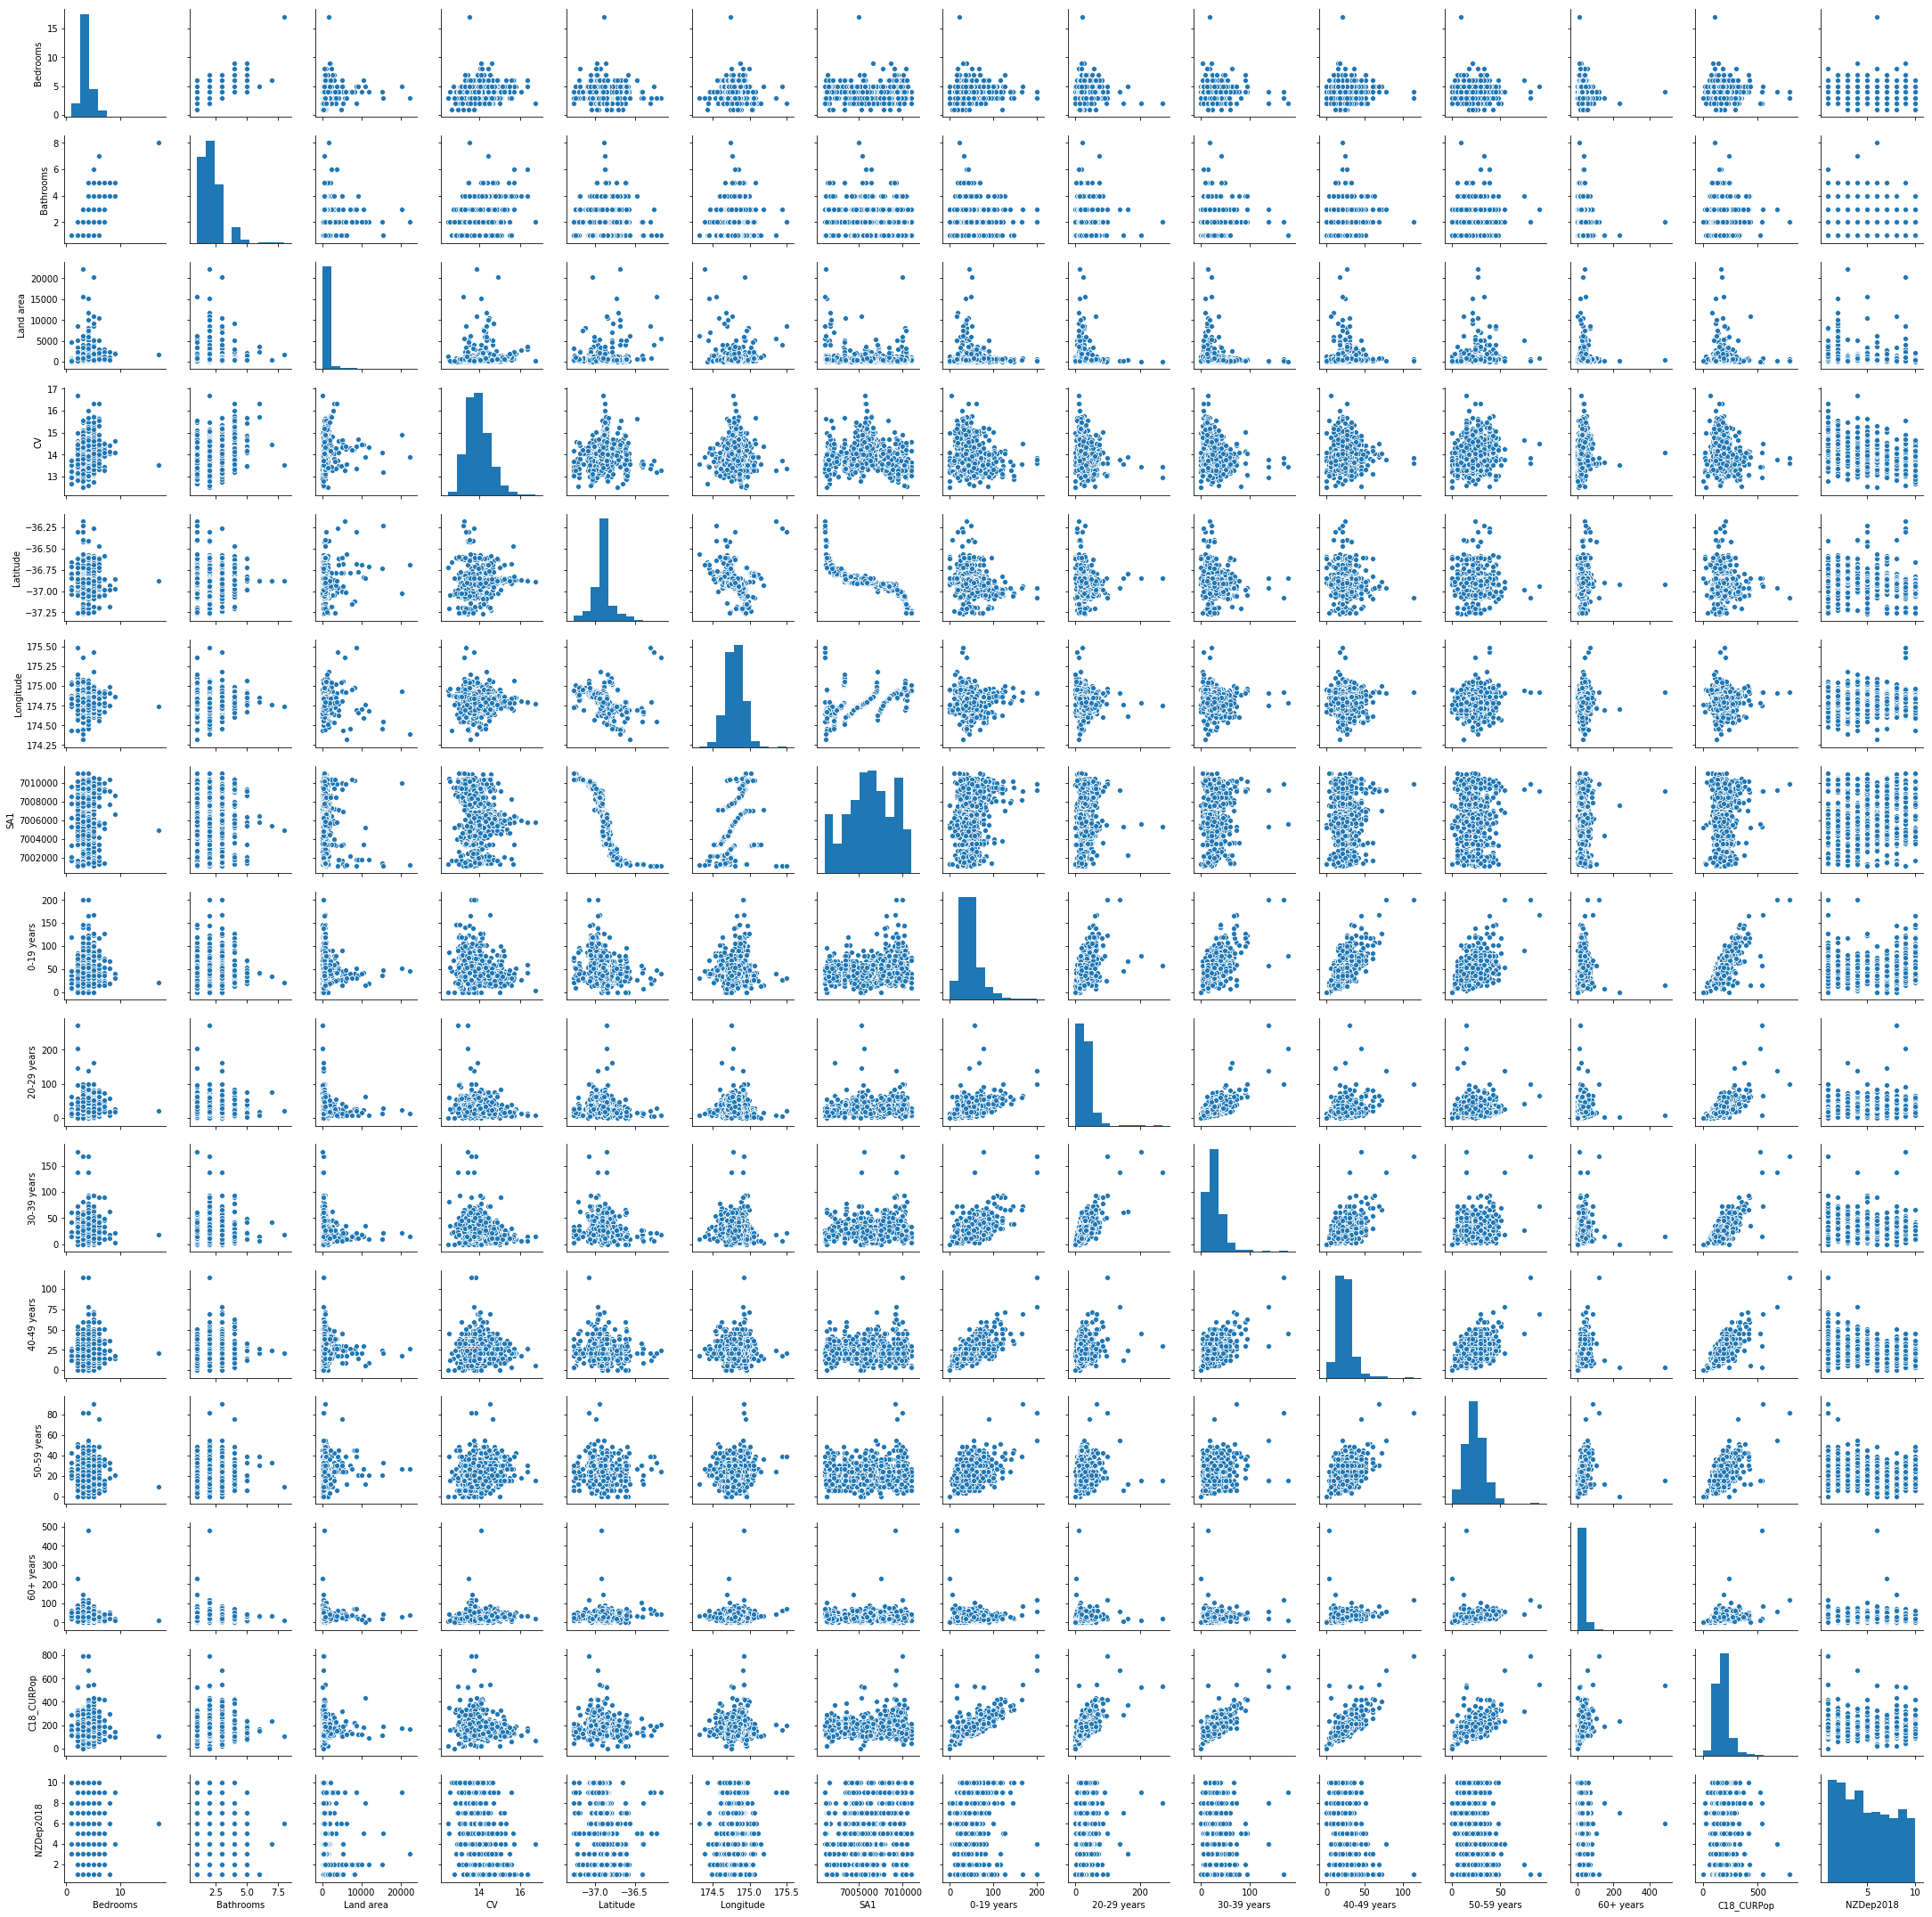

In [26]:
sns.pairplot(df, height = 2.0)

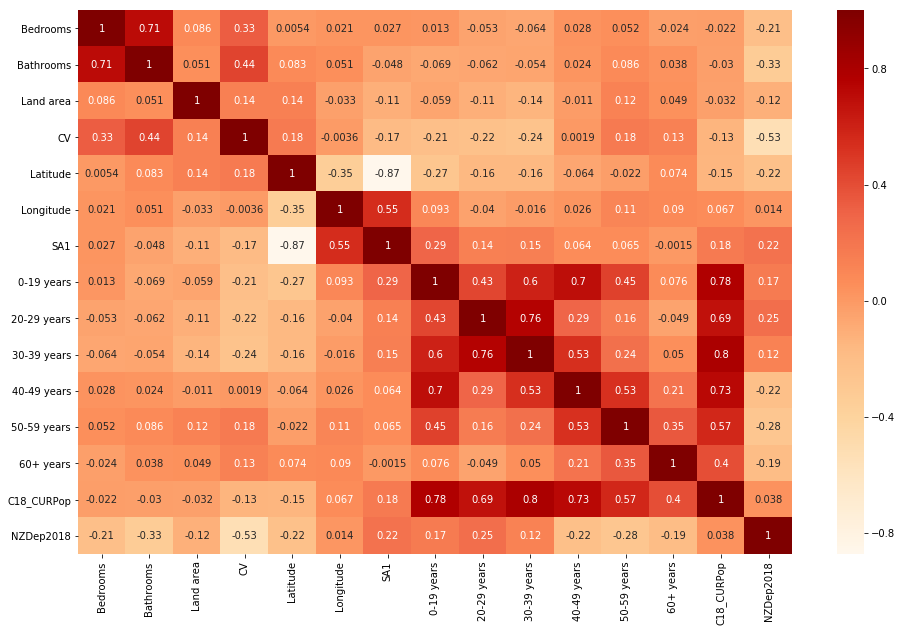

In [27]:
ax, fig = plt.subplots(figsize = (16,10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="OrRd")
plt.show()

In [28]:
x = df[['Bedrooms', 'CV', 'NZDep2018']]
x.head()

,Bedrooms,CV,NZDep2018
0,5,13.774689,6.0
1,5,14.038654,1.0
2,6,14.038654,1.0
3,2,13.514405,2.0
4,3,13.353475,9.0


In [29]:
x = x.drop([309], axis = 0)
x = x.drop([311], axis = 0)

In [30]:
y = df['Bathrooms']
y.head()

0    3.0
1    3.0
2    4.0
3    1.0
4    1.0
Name: Bathrooms, dtype: float64

In [31]:
y = y.drop([309], axis = 0)
y = y.drop([311], axis = 0)

In [32]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)

model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
predicted = model.predict(test_x)

In [34]:
model.score(test_x, test_y)

0.5896488414554422

In [35]:
z = df[['Bedrooms', 'CV', 'NZDep2018']]
z = z.loc[[309, 311]]
predict = model.predict(z)

In [36]:
predict

array([2.36143658, 2.32374732])

In [37]:
df["Bathrooms"].fillna(2, inplace = True)  

In [40]:
x = df.drop(['CV', 'Address', 'Suburbs'], axis=1)
x.head()

,Bedrooms,Bathrooms,Land area,Latitude,Longitude,SA1,0-19 years,20-29 years,30-39 years,40-49 years,50-59 years,60+ years,C18_CURPop,NZDep2018
0,5,3.0,714,-37.012920,174.904069,7009770,48,27,24,21,24,21,177,6.0
1,5,3.0,564,-37.063672,174.922912,7009991,42,18,12,21,15,30,123,1.0
2,6,4.0,626,-37.063580,174.924044,7009991,42,18,12,21,15,30,123,1.0
3,2,1.0,65,-36.912996,174.787425,7007871,42,6,21,21,12,15,120,2.0
4,3,1.0,601,-36.979037,174.892612,7008902,93,27,33,30,21,33,228,9.0


In [42]:
y = df['CV']
y.head()

0    13.774689
1    14.038654
2    14.038654
3    13.514405
4    13.353475
Name: CV, dtype: float64

In [43]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.3)
model = LinearRegression()
model.fit(train_x, train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
predicted = model.predict(test_x)

Text(0, 0.5, 'Predicted')

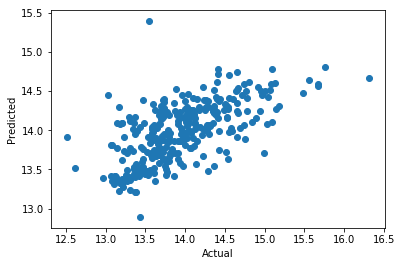

In [45]:
plt.scatter(test_y, predicted)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [46]:
model.score(test_x, test_y)

0.3985829197997681

In [49]:
model2 = RandomForestRegressor()
model2.fit(train_x, train_y)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [50]:
predicted2 = model2.predict(test_x)

Text(0, 0.5, 'Predicted')

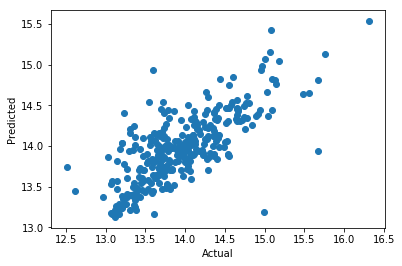

In [51]:
plt.scatter(test_y, predicted2)
plt.xlabel('Actual')
plt.ylabel('Predicted')

In [52]:
model2.score(test_x, test_y)

0.5441811297507906